In [2]:
#load dataset
import pandas as pd
df = pd.read_excel('combined.xlsx')
df.head()

,Website,Title,Type,Duration,Timeline,Rating,Reviews,Category,Price,Source,Country
0,OpenUniversity,Academi Arian MSE,Introductory,12,Hours,4.0,0,Business & Management,0.0,The Open University,United Kingdom
1,OpenUniversity,Advancing Black leadership,Introductory,24,Hours,5.0,0,Business & Management,0.0,The Open University,United Kingdom
2,OpenUniversity,A freelance career in the creative arts,Introductory,24,Hours,4.0,8,Business & Management,0.0,The Open University,United Kingdom
3,OpenUniversity,An introduction to public leadership,Introductory,9,Hours,4.0,4,Business & Management,0.0,The Open University,United Kingdom
4,OpenUniversity,Asset allocation in investment,Advanced,9,Hours,4.0,8,Business & Management,0.0,The Open University,United Kingdom


In [3]:
df.tail()

,Website,Title,Type,Duration,Timeline,Rating,Reviews,Category,Price,Source,Country
2384,FutureLearn,How to become a primary school teacher,Course,2,courses,0.0,0,Education & Teaching,19.99,Blog Post,Unknown
2385,FutureLearn,Explore: The education industry,Course,2,courses,0.0,0,Education & Teaching,19.99,Blog Post,Unknown
2386,FutureLearn,How to become a math's teacher,Course,2,courses,0.0,0,Education & Teaching,19.99,Blog Post,Unknown
2387,FutureLearn,What is inclusive education?,Course,2,courses,0.0,0,Education & Teaching,19.99,Blog Post,Unknown
2388,FutureLearn,How to become a teacher in the UK,Course,2,courses,0.0,0,Education & Teaching,19.99,Blog Post,Unknown


In [4]:
print(df.info())        # Overview of column types and non-null values
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Website    2389 non-null   object 
 1   Title      2389 non-null   object 
 2   Type       2389 non-null   object 
 3   Duration   2389 non-null   int64  
 4   Timeline   2389 non-null   object 
 5   Rating     2389 non-null   float64
 6   Reviews    2389 non-null   int64  
 7   Category   2389 non-null   object 
 8   Price      2389 non-null   float64
 9   Source     2389 non-null   object 
 10  Country    2389 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 205.4+ KB
None
          Duration       Rating        Reviews        Price
count  2389.000000  2389.000000    2389.000000  2389.000000
mean      8.680620     3.822394    3585.990791    13.638204
std       7.047913     1.655784   17236.130543    17.577149
min       1.000000     0.000000       0.000000     0.000000
25% 

In [5]:
rows, columns = df.shape

print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 2389 rows and 11 columns.


In [6]:
#check null values
print(df.isnull().sum())

Website      0
Title        0
Type         0
Duration     0
Timeline     0
Rating       0
Reviews      0
Category     0
Price        0
Source       0
Country      0
dtype: int64


In [7]:
print(df['Type'].value_counts())  # Count frequency of each type
print(df['Source'].value_counts())  # Frequency of universities


Type
Introductory                750
Course                      625
Intermediate                398
Advanced                    292
Specialization              163
Degree                       84
Professional Certificate     77
Name: count, dtype: int64
Source
The Open University                                                              1449
University of Michigan                                                             42
IBM                                                                                34
University of Pennsylvania                                                         32
Google                                                                             31
                                                                                 ... 
Utrecht University                                                                  1
The State University of New York                                                    1
Exploratorium                                     

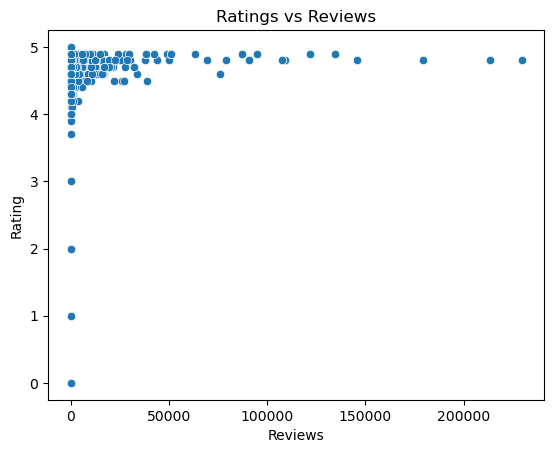

In [8]:
# Now plot the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title('Ratings vs Reviews')
plt.show()

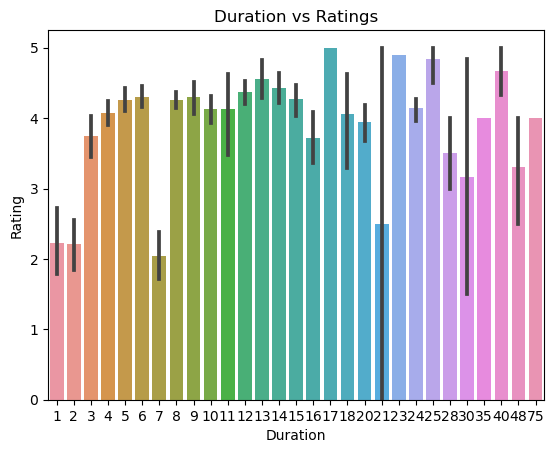

In [9]:
sns.barplot(x='Duration', y='Rating', data=df)
plt.title('Duration vs Ratings')
plt.show()

In [10]:
avg_ratings_by_type = df.groupby('Type')['Rating'].mean()
print(avg_ratings_by_type)


Type
Advanced                    4.167808
Course                      3.356160
Degree                      0.000000
Intermediate                4.180905
Introductory                4.056000
Professional Certificate    4.633766
Specialization              4.627607
Name: Rating, dtype: float64


In [11]:
top_universities = df.groupby('Source')['Reviews'].sum().sort_values(ascending=False)
print(top_universities.head(10))

Source
Google                        2226333
DeepLearning.AI               1423377
University of Michigan        1227324
IBM                            411841
Johns Hopkins University       377577
Yale University                305521
Yonsei University              278212
Deep Teaching Solutions        272953
Stanford University            258928
University of Pennsylvania     183109
Name: Reviews, dtype: int64


In [12]:
df['popularity'] = df['Rating'] * df['Reviews']
print(df[['Title', 'popularity']].sort_values(by='popularity', ascending=False))


                                                  Title  popularity
1660  Programming for Everybody (Getting Started wit...   1101782.4
1694  Programming for Everybody (Getting Started wit...   1101782.4
1659                Python for Everybody Specialization   1025116.8
1683                Python for Everybody Specialization   1025116.8
1656         Google IT Support Professional Certificate    860769.6
...                                                 ...         ...
1145                   Introduction to complex analysis         0.0
1144                           Introduction to analysis         0.0
1143                            Introduction to algebra         0.0
1142                    Introduction to active galaxies         0.0
2388                  How to become a teacher in the UK         0.0

[2389 rows x 2 columns]


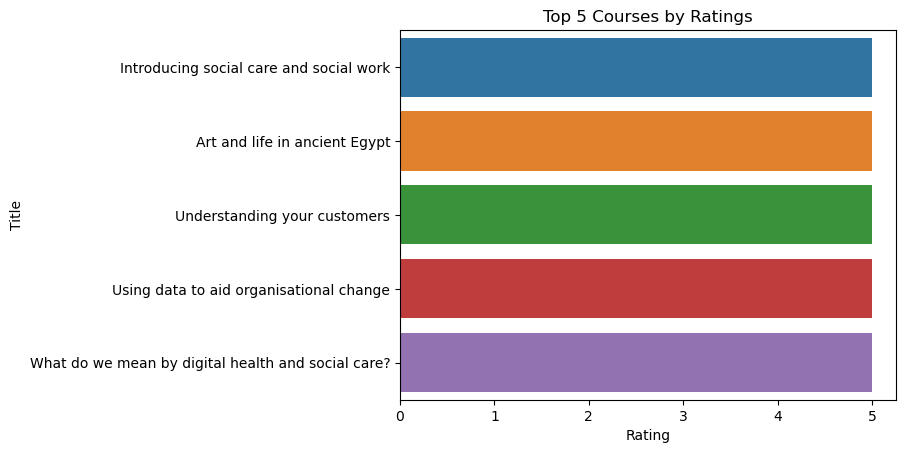

In [13]:
top_courses = df.sort_values(by='Rating', ascending=False).head(5)
sns.barplot(y='Title', x='Rating', data=top_courses)
plt.title('Top 5 Courses by Ratings')
plt.show()

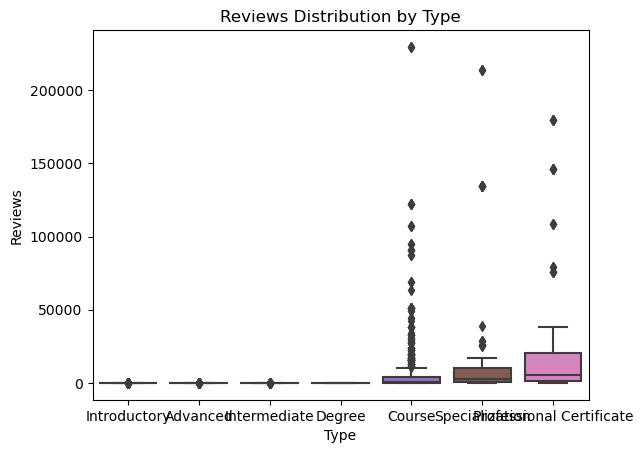

In [14]:
sns.boxplot(x='Type', y='Reviews', data=df)
plt.title('Reviews Distribution by Type')
plt.show()

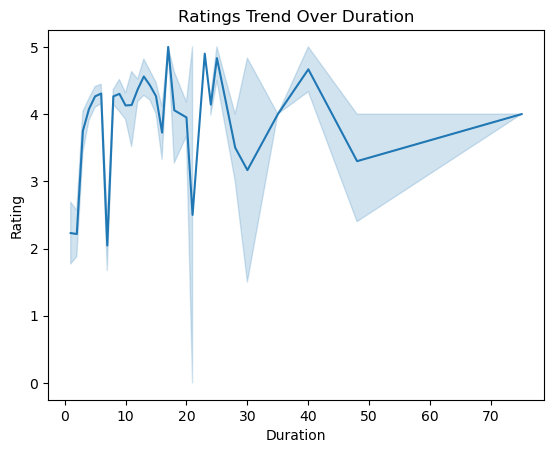

In [15]:
sns.lineplot(x='Duration', y='Rating', data=df)
plt.title('Ratings Trend Over Duration')
plt.show()
